In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2025-09-29 14:53:43.420388: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-29 14:53:43.467265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-29 14:53:45.053756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
rows,cols = 28,28
# Reshaping in 4D
x_train = x_train.reshape(x_train.shape[0],rows,cols,1)
x_test = x_test.reshape(x_test.shape[0],rows,cols,1)

input_shape = (rows,cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

# One hot encoding labels
y_train = tf.keras.utils.to_categorical(y_train,10)

In [11]:
# LeNet-5 Model
def build_leNet(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(
            filters=6,
            strides=(1,1),
            kernel_size=(5,5),
            activation='tanh',
            input_shape=input_shape,
            ),
        tf.keras.layers.AveragePooling2D(
            pool_size=(2,2),
            strides=(2,2),
            ),
        tf.keras.layers.Conv2D(
            filters=6,
            strides=(1,1),
            kernel_size=(5,5),
            activation='tanh',
        ),
        tf.keras.layers.AveragePooling2D(
            pool_size=(2,2),
            strides=(2,2)
        ),
        tf.keras.layers.Dense(
            units=120,
            activation='tanh',
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            units=84,
            activation='tanh',
        ),
        tf.keras.layers.Dense(
            units=10,
            activation='softmax',
        ),
    ])
    return model


/mnt/870cc35c-9667-4587-917b-ab53a7d94aa3/Python Project/.venv/lib64/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1759138339.076654   31982 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759138339.085177   31982 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10


2025-09-29 15:17:19.356743: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9050 - loss: 0.3262
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9588 - loss: 0.1401
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9722 - loss: 0.0940
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9783 - loss: 0.0718
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9822 - loss: 0.0595
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9843 - loss: 0.0510
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9863 - loss: 0.0450
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9879 - loss: 0.0399
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9890 - loss: 0.0362
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9901 - loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0486
Accuracy 0.9843999743461609
Training Data (60000, 28, 28) (60000,

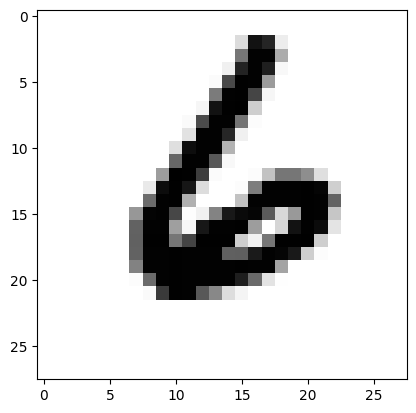

In [12]:
lenet = build_leNet(input_shape)

lenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

epochs=10

history= lenet.fit(x_train,y_train,epochs=epochs,batch_size=128,verbose=1 )

if len(y_test.shape) != 2 or y_test.shape[1] !=10:
    y_test = tf.keras.utils.to_categorical(y_test,10)
    
loss , acc = lenet.evaluate(x_test,y_test)
print('Accuracy',acc)

x_train = x_train.reshape(x_train.shape[0],28,28)
print('Training Data', x_train.shape,y_train.shape)
x_test = x_test.reshape(x_test.shape[0],28,28)
print('Test Data',x_test.shape,y_test.shape)

image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

pred = lenet.predict(x_test[image_index].reshape(1,rows,cols,1))
print(pred.argmax())

